* Carrega o DF a partir do .csv gerado pelo scraping

In [10]:
import pandas as pd

df_raw=pd.read_csv('./medicos_raw.csv')
df_raw

,nome,especialidade,crm,endereco,numeros_whatsapp,procedimentos,url
0,Dra. Cibelle Panfiglio Soares Bourbon,Médico alergista e imunologista,CRM 4075,"Avenida Ministro Geraldo Barreto Sobral, 2131 ...","(79) 99176-3532, (79) 99199-7750",Os procedimentos que realizo são: Teleconsulta...,https://agendarconsulta.com/perfil/dra-cibelle...
1,Dr. Thyago Nunes,Médico alergista e imunologista,CRM 8048,"Avenida Miguel Sutil, 8000 - Santa Rosa Tower ...",(65) 99330-1296,Os procedimentos que realizo são: Atendimento ...,https://agendarconsulta.com/perfil/dr-thyago-n...
2,Dra. Joélia Cronemberger Ribeiro Silva Gomes,Médico alergista e imunologista,CRM 35919,"Rua Salvador dos Santos Nora, 25 - Sala 208 - ...",(35) 99702-2592,"Os procedimentos que realizo são: Consultas, T...",https://agendarconsulta.com/perfil/dra-joelia-...
3,Dra. FLAVIA AMENDOLA ANISIO DE CARVALHO,Médico alergista e imunologista,CRM 52780278,"Largo do Machado, 29 - SALA 611 - Catete, Rio ...",(21) 98900-2638,Os procedimentos que realizo são: Diagnostico ...,https://agendarconsulta.com/perfil/dra-flavia-...
4,Dra. FATIMA TERESA LACERDA BRITO DE OLIVEIRA,Médico alergista e imunologista,CRM 13097,"Rua Catulo da Paixão Cearense, 175 - 29 andar ...",(85) 99263-3758,O procedimento que realizo é Atendimento de al...,https://agendarconsulta.com/perfil/dr-fatima-t...
...,...,...,...,...,...,...,...
6851,Dr. Luiz Fernando Castro,Médico urologista,NaN,NaN,NaN,NaN,https://agendarconsulta.com/perfil/dr-luiz-fer...
6852,Dr. Maurício Silva,Médico urologista,NaN,NaN,NaN,NaN,https://agendarconsulta.com/perfil/dr-mauricio...
6853,Dr. CLEUDINEI BASTO,Médico urologista,NaN,NaN,NaN,NaN,https://agendarconsulta.com/perfil/dr-cleudine...
6854,Dr. Rander Farias,Médico urologista,NaN,NaN,NaN,NaN,https://agendarconsulta.com/perfil/dr-rander-f...


* Converte os DTypes

In [11]:
df_raw=df_raw.astype({
                        'nome':'string', 
                        'especialidade':'string', 
                        'crm':'string', 
                        'endereco':'string', 
                        'numeros_whatsapp':'string', 
                        'procedimentos':'string', 
                        'url':'string'
                    })
df_raw.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6856 entries, 0 to 6855
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   nome              6856 non-null   string
 1   especialidade     6854 non-null   string
 2   crm               6362 non-null   string
 3   endereco          5671 non-null   string
 4   numeros_whatsapp  4306 non-null   string
 5   procedimentos     3020 non-null   string
 6   url               6856 non-null   string
dtypes: string(7)
memory usage: 375.1 KB


* Limpeza de registros não desejados

In [20]:
# Cria um backup
df=df_raw.copy()

# Remove linhas com "N/A" na coluna 'nome'
df=df[df['nome'].str.upper() != 'N/A']

# Remove linhas com "teste" no nome (case insensitive)
df=df[~df['nome'].str.contains('teste', case=False, na=False)]

# Remove linhas com "N/A" na coluna 'numeros_whatsapp'
df=df[df['numeros_whatsapp'].str.upper() != 'N/A']

# Resultado
df.reset_index(drop=True, inplace=True)
df.isna().sum()

nome                   0
especialidade          2
crm                   51
endereco             270
numeros_whatsapp       0
procedimentos       1807
url                    0
dtype: int64

In [21]:
df

,nome,especialidade,crm,endereco,numeros_whatsapp,procedimentos,url
0,Dra. Cibelle Panfiglio Soares Bourbon,Médico alergista e imunologista,CRM 4075,"Avenida Ministro Geraldo Barreto Sobral, 2131 ...","(79) 99176-3532, (79) 99199-7750",Os procedimentos que realizo são: Teleconsulta...,https://agendarconsulta.com/perfil/dra-cibelle...
1,Dr. Thyago Nunes,Médico alergista e imunologista,CRM 8048,"Avenida Miguel Sutil, 8000 - Santa Rosa Tower ...",(65) 99330-1296,Os procedimentos que realizo são: Atendimento ...,https://agendarconsulta.com/perfil/dr-thyago-n...
2,Dra. Joélia Cronemberger Ribeiro Silva Gomes,Médico alergista e imunologista,CRM 35919,"Rua Salvador dos Santos Nora, 25 - Sala 208 - ...",(35) 99702-2592,"Os procedimentos que realizo são: Consultas, T...",https://agendarconsulta.com/perfil/dra-joelia-...
3,Dra. FLAVIA AMENDOLA ANISIO DE CARVALHO,Médico alergista e imunologista,CRM 52780278,"Largo do Machado, 29 - SALA 611 - Catete, Rio ...",(21) 98900-2638,Os procedimentos que realizo são: Diagnostico ...,https://agendarconsulta.com/perfil/dra-flavia-...
4,Dra. FATIMA TERESA LACERDA BRITO DE OLIVEIRA,Médico alergista e imunologista,CRM 13097,"Rua Catulo da Paixão Cearense, 175 - 29 andar ...",(85) 99263-3758,O procedimento que realizo é Atendimento de al...,https://agendarconsulta.com/perfil/dr-fatima-t...
...,...,...,...,...,...,...,...
4301,Dr. Eugênio Rocha Jr,Médico urologista,CRM 4542,"Avenida Djalma Batista, 1661 - Sala 1706 T. Mé...",(92) 99112-5228,<NA>,https://agendarconsulta.com/perfil/dr-eugenio-...
4302,Dr. Maiko Martins de arruda Martins,Médico urologista,<NA>,<NA>,(64) 99942-9654,<NA>,https://agendarconsulta.com/perfil/dr-maiko-ma...
4303,Dr. Murilo Murata,Médico urologista,CRM 23816,<NA>,(41) 99977-4682,<NA>,https://agendarconsulta.com/perfil/dr-murilo-m...
4304,Dr. Mário Frederico,Médico urologista,<NA>,<NA>,(23) 8598-7898,<NA>,https://agendarconsulta.com/perfil/dr-mario-fr...


* Salva o novo DF num arquivo .csv

In [23]:
df.to_csv('./medicos_clean.csv',index=False)

* Análise EDA em cima da base limpa

In [34]:
especialidade_counts = df['especialidade'].value_counts()
especialidade_counts

especialidade
Médico cardiologista                             374
Médico ginecologista e obstetra                  353
Médico pediatra                                  339
Médico dermatologista                            337
Médico clínico                                   311
Médico oftalmologista                            306
Médico endocrinologista e metabologista          283
Médico ortopedista e traumatologista             206
Médico psiquiatra                                205
Médico neurologista                              169
Médico urologista                                147
Médico otorrinolaringologista                    137
Médico geriatra                                  112
Médico gastroenterologista                       106
Médico em cirurgia vascular                      104
Médico neurocirurgião                             93
Médico nutrologista                               92
Médico cirurgião geral                            91
Médico alergista e imunologista 

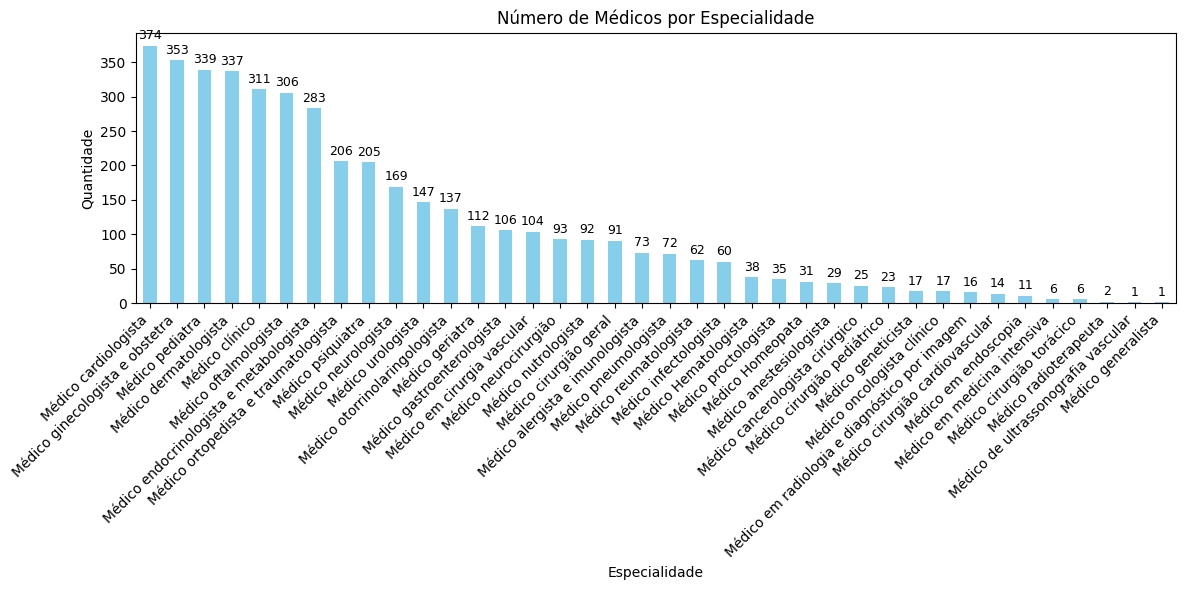

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
ax = especialidade_counts.plot(kind='bar', color='skyblue')

plt.title('Número de Médicos por Especialidade')
plt.xlabel('Especialidade')
plt.ylabel('Quantidade')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

for i, v in enumerate(especialidade_counts):
    ax.text(i, v + 5, str(v), ha='center', va='bottom', fontsize=9)

plt.show()
